# Laboration - Covid-19



In [7]:
# Setup
import pandas as pd
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load Swedish C19 data
c19sweden = pd.read_excel(
    "Folkhalsomyndigheten_Covid19.xlsx",
    sheet_name="Veckodata Riket"
)


## 1a) Överblick över data

- veckonummerkolumnen nollställs vid årsskifte

- 13 kolumner och 89 rader, mestadels int, men två har floats

- Kolumnnamn:

['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv']

In [5]:
c19sweden.iloc[45:55]


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
45,2020,51,46177,447,869,384203,3720,187,3825,645,62.500000,8780,850.200012
46,2020,52,37134,360,807,421337,4080,206,4031,643,62.299999,9423,912.400024
47,2020,53,41323,400,760,462660,4480,234,4265,663,64.199997,10086,976.599976
48,2021,1,39455,380,780,502115,4838,185,4450,644,62.000000,10730,1033.800049
49,2021,2,28942,279,659,531057,5117,153,4603,598,57.599998,11328,1091.400024
50,2021,3,23230,224,503,554287,5340,125,4728,513,49.400002,11841,1140.800049
51,2021,4,20660,199,423,574947,5539,109,4837,389,37.500000,12230,1178.300049
52,2021,5,19605,189,388,594552,5728,105,4942,269,25.900000,12499,1204.199951
53,2021,6,21283,205,394,615835,5933,105,5047,205,19.799999,12704,1224.000000
54,2021,7,23615,228,433,639450,6161,109,5156,171,16.500000,12875,1240.500000


In [6]:
c19sweden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [8]:
c19sweden.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

## 1b) Slå ihop år och veckonummer

Så att det står ÅR v VECKONUMMER: "2020v12"

In [19]:
c19sweden["vecka"] = c19sweden["år"].astype(str) + "v" + c19sweden["veckonummer"].astype(str)

# Check
c19sweden["vecka"]

0      2020v6
1      2020v7
2      2020v8
3      2020v9
4     2020v10
       ...   
84    2021v37
85    2021v38
86    2021v39
87    2021v40
88    2021v41
Name: vecka, Length: 89, dtype: object

## 1c-f) Rita diagram

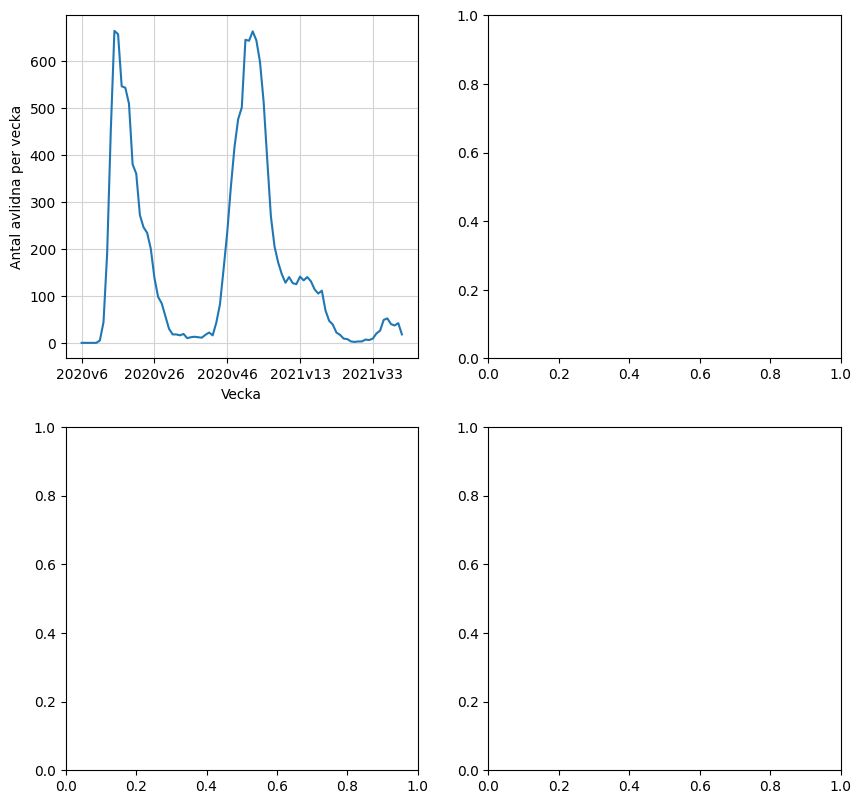

In [56]:
# With seaborn
#
# Subplots are named after problem-letter, easier to follow(?)
fig,ax = plt.subplots(
    2,2, 
    dpi=100,
    figsize=(10,10)
)

# 1c avlidna fall per vecka, 2020v6 to now
#
# Some settings (labels and position of ticks)
ax[0,0].set(ylabel="Antal avlidna per vecka", xlabel="Vecka")
ax[0,0].set_xticks(list(range(0,len(c19sweden["vecka"]),20)))
ax[0,0].grid(color="lightgray")

# Plot
sns.lineplot(
    data=c19sweden,
    x="vecka", y="Antal_avlidna_vecka", 
    ax=ax[0,0]
);


# TODO

# 1d nya fall per vecka, 2020v6 to now.


# 1e avlidna fall per vecka & nya fall per vecka, 2020v6 to now



# 1f kumulativt antal fall, 2020v6 to now

# save figure: 1cdef_seaborn.png



In [36]:
list(range(0,len(c19sweden["vecka"]),10))

[0, 10, 20, 30, 40, 50, 60, 70, 80]